In [1]:
import numpy as np
import pandas as pd
import matplotlib as plt
%matplotlib inline
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import load_iris #for validation
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.datasets import mnist #for validation




In [2]:
train_data = pd.read_csv('data/sign_mnist_train.csv')

test_data = pd.read_csv('data/sign_mnist_test.csv')


In [3]:
train_data.head(6)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179
5,16,161,168,172,173,178,184,189,193,196,...,76,74,68,62,53,55,48,238,255,255


In [4]:
y_train = train_data.iloc[:,0]
y_train.head()

0     3
1     6
2     2
3     2
4    13
Name: label, dtype: int64

In [5]:
train_label_freq = y_train.groupby(y_train).count()
train_label_freq.head()

label
0    1126
1    1010
2    1144
3    1196
4     957
Name: label, dtype: int64

<AxesSubplot:xlabel='label'>

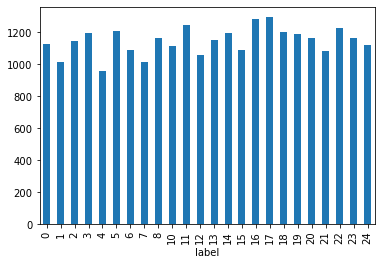

In [6]:


train_label_freq.plot.bar()

dataset appears balances enough for use

In [7]:
X_train = train_data.iloc[:,1:]
X_train.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,107,118,127,134,139,143,146,150,153,156,...,207,207,207,207,206,206,206,204,203,202
1,155,157,156,156,156,157,156,158,158,157,...,69,149,128,87,94,163,175,103,135,149
2,187,188,188,187,187,186,187,188,187,186,...,202,201,200,199,198,199,198,195,194,195
3,211,211,212,212,211,210,211,210,210,211,...,235,234,233,231,230,226,225,222,229,163
4,164,167,170,172,176,179,180,184,185,186,...,92,105,105,108,133,163,157,163,164,179


In [8]:
y_test = test_data.iloc[:,0]
X_test = test_data.iloc[:,1:]

    From the class notebook section BUILDING A CNN USING TENSORFLOW     

In [9]:
# Specific neural network models & layer types
from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout


from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten

In [10]:
# Check out the data
print(f'X_train shape: {X_train.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_test shape: {y_test.shape}')

X_train shape: (27455, 784)
y_train shape: (27455,)
X_test shape: (7172, 784)
y_test shape: (7172,)


In [11]:
# range of x values
print(f'X range: {X_train.min()[0]}-{X_train.max()[0]}') #just for show
# y unique values
print(f'y values: {np.unique(y_train)}')
num_classes = len(np.unique(y_train))
print(f'Number of classes: {num_classes}') #no 9's present

X range: 0-255
y values: [ 0  1  2  3  4  5  6  7  8 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]
Number of classes: 24


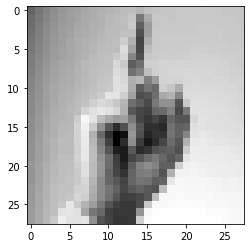

In [12]:
# plt.pyplot.imshow(X_train.iloc[0,:]) 
# error generated: Invalid shape (784,) for image data
#sqrt(784) = 28
sample_image = X_train.iloc[0,:].values.reshape(28,28)
plt.pyplot.imshow(sample_image, cmap = 'gray')

creating an __X_train__ array of 28x28 images

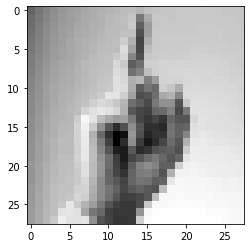

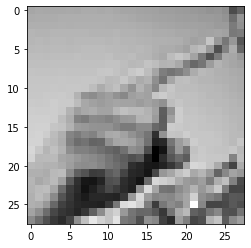

(27455, 28, 28)

In [13]:
X_images_train = []
for n in range(X_train.shape[0]):
    nth_image = X_train.iloc[n,:].values.reshape(28,28)
    X_images_train.append(nth_image)

#showing results
plt.pyplot.imshow(X_images_train[0], cmap = 'gray')
plt.pyplot.show()
plt.pyplot.imshow(X_images_train[1], cmap = 'gray')
plt.pyplot.show()
np.array(X_images_train).shape

Creating a matching __X_test__ array of 28x28 images

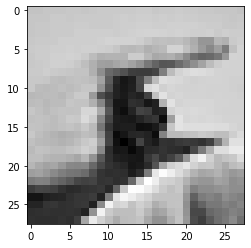

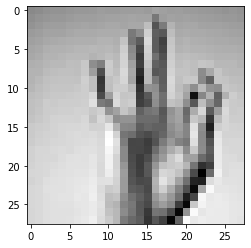

(27455, 28, 28)

In [14]:
X_images_test = []
for n in range(X_test.shape[0]):
    nth_image = X_test.iloc[n,:].values.reshape(28,28)
    X_images_test.append(nth_image)


plt.pyplot.imshow(X_images_test[0], cmap = 'gray')
plt.pyplot.show()
plt.pyplot.imshow(X_images_test[1], cmap = 'gray')
plt.pyplot.show()
np.array(X_images_train).shape

In [15]:
# Define input image dimensions
img_rows, img_cols = 28, 28
# Reshape for Keras model types
X_train = X_train.values.reshape(X_train.shape[0], img_rows, img_cols, 1)
X_test = X_test.values.reshape(X_test.shape[0], img_rows, img_cols, 1)

print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')


X_train shape: (27455, 28, 28, 1)
X_test shape: (7172, 28, 28, 1)


Scaling pixel values from 0-255 to 0-1 linearly (min-max scaling)

In [16]:
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

print(f'X_train range: {X_train.min()}-{X_train.max()}')

X_train range: 0.0-1.0


Constructing the CNN model

In [17]:
CNN_model = Sequential()





CNN_model.add(Conv2D(32, kernel_size=(3, 3), activation = 'relu', input_shape = (28, 28, 1)))

CNN_model.add(Conv2D(64, (3, 3), activation='relu'))
CNN_model.add(MaxPooling2D(pool_size=(2, 2))) #avg pooling may also be used

CNN_model.add(Dropout(0.25)) #dropout may be varied here



CNN_model.add(Flatten())


CNN_model.add(Dense(128, activation='relu'))
CNN_model.add(Dropout(0.5))

# num_classes was here, but as the labels are missing an int before 24m
# num_classes is too small
# if this results in it guessing a nonexistant class or something
# here may be why
CNN_model.add(Dense(num_classes+1, activation='softmax'))

# Print out a summary of the network
CNN_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 9216)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               1179776   
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0

Compiling

In [25]:
CNN_model.compile(loss = 'sparse_categorical_crossentropy', #loss function
                  optimizer = 'Adam',
                  metrics = ['accuracy']) #value to maximize

Training

In [19]:
X_train, X_vali, y_train, y_vali = train_test_split(X_train, y_train, test_size = .32)

In [26]:
# Fit the model on the training data, defining desired batch_size & number of epochs,
# running validation on the test data after each batch
# THIS WILL TAKE A LONG TIME TO RUN!!!
CNN_model.fit(X_train, y_train,
              batch_size = 128,
              epochs = 15,
              verbose = 1,
              validation_data = (X_vali, y_vali))

Epoch 1/15
146/146 [==============================] - 22s 154ms/step - loss: 0.0486 - accuracy: 0.9831 - val_loss: 6.9047e-04 - val_accuracy: 0.9999
Epoch 2/15
146/146 [==============================] - 23s 155ms/step - loss: 0.0437 - accuracy: 0.9861 - val_loss: 4.5489e-04 - val_accuracy: 1.0000
Epoch 3/15
146/146 [==============================] - 22s 150ms/step - loss: 0.0412 - accuracy: 0.9855 - val_loss: 1.9994e-04 - val_accuracy: 1.0000
Epoch 4/15
146/146 [==============================] - 22s 149ms/step - loss: 0.0374 - accuracy: 0.9882 - val_loss: 2.2713e-04 - val_accuracy: 1.0000
Epoch 5/15
146/146 [==============================] - 22s 148ms/step - loss: 0.0311 - accuracy: 0.9894 - val_loss: 1.6691e-04 - val_accuracy: 1.0000
Epoch 6/15
146/146 [==============================] - 21s 145ms/step - loss: 0.0350 - accuracy: 0.9878 - val_loss: 8.3616e-05 - val_accuracy: 1.0000
Epoch 7/15
146/146 [==============================] - 22s 151ms/step - loss: 0.0289 - accuracy: 0.9898 - v

evaluating via test data

In [27]:
score = CNN_model.evaluate(X_test, y_test, verbose=1)

print('Test loss:', score[0])
print('Test accuracy:', score[1])

225/225 [==============================] - 2s 10ms/step - loss: 0.5956 - accuracy: 0.9126
Test loss: 0.595599353313446
Test accuracy: 0.9125766754150391


This evaluation step seems pretty quick - perhaps input multiple images from video feed at once and let it return the mode?

In [28]:
print(X_train)

[[[[0.7019608 ]
   [0.7176471 ]
   [0.7294118 ]
   ...
   [0.79607844]
   [0.7921569 ]
   [0.79607844]]

  [[0.72156864]
   [0.73333335]
   [0.7529412 ]
   ...
   [0.8117647 ]
   [0.80784315]
   [0.8       ]]

  [[0.7372549 ]
   [0.7529412 ]
   [0.76862746]
   ...
   [0.827451  ]
   [0.8235294 ]
   [0.8156863 ]]

  ...

  [[0.77254903]
   [0.8       ]
   [0.83137256]
   ...
   [1.        ]
   [1.        ]
   [1.        ]]

  [[0.45882353]
   [0.4627451 ]
   [0.4745098 ]
   ...
   [1.        ]
   [1.        ]
   [1.        ]]

  [[0.49411765]
   [0.49019608]
   [0.49019608]
   ...
   [0.8980392 ]
   [0.91764706]
   [1.        ]]]


 [[[0.6784314 ]
   [0.68235296]
   [0.6901961 ]
   ...
   [0.654902  ]
   [0.64705884]
   [0.6392157 ]]

  [[0.6862745 ]
   [0.6901961 ]
   [0.69803923]
   ...
   [0.6627451 ]
   [0.65882355]
   [0.64705884]]

  [[0.6901961 ]
   [0.69803923]
   [0.70980394]
   ...
   [0.67058825]
   [0.6666667 ]
   [0.6627451 ]]

  ...

  [[0.5254902 ]
   [0.5294118 ]
   [0.5

Trying the second data set.

In [23]:
train_col_data = 

SyntaxError: invalid syntax (<ipython-input-23-179e8bd63ab0>, line 1)